In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px 



In [4]:
df= pd.read_csv("amazon_sales_data 2025.csv")

In [5]:
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [7]:
df.isnull().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

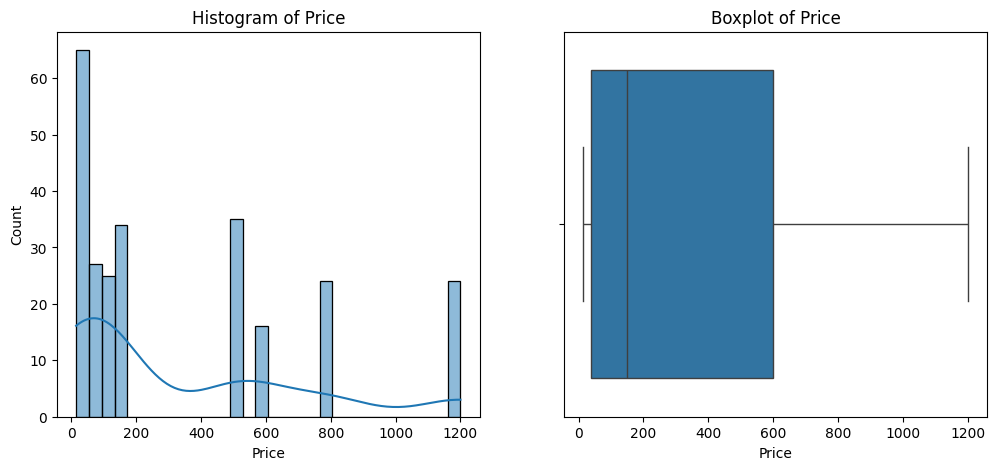

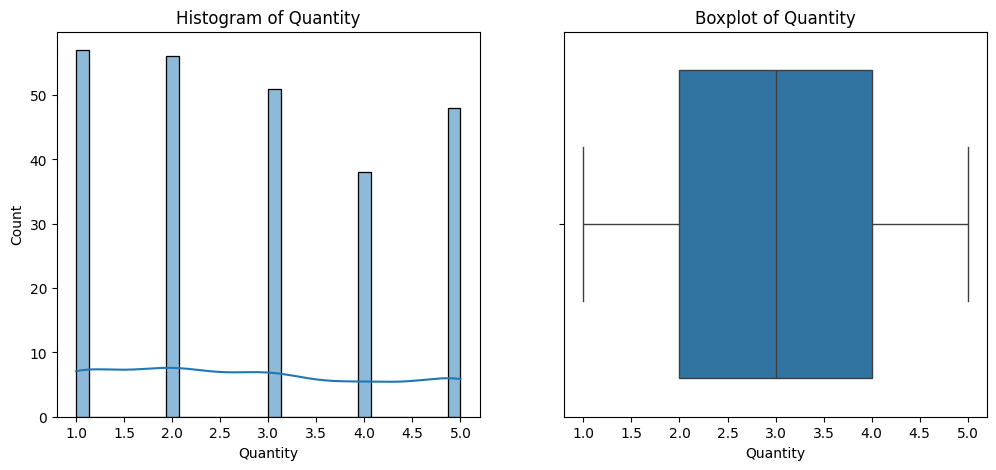

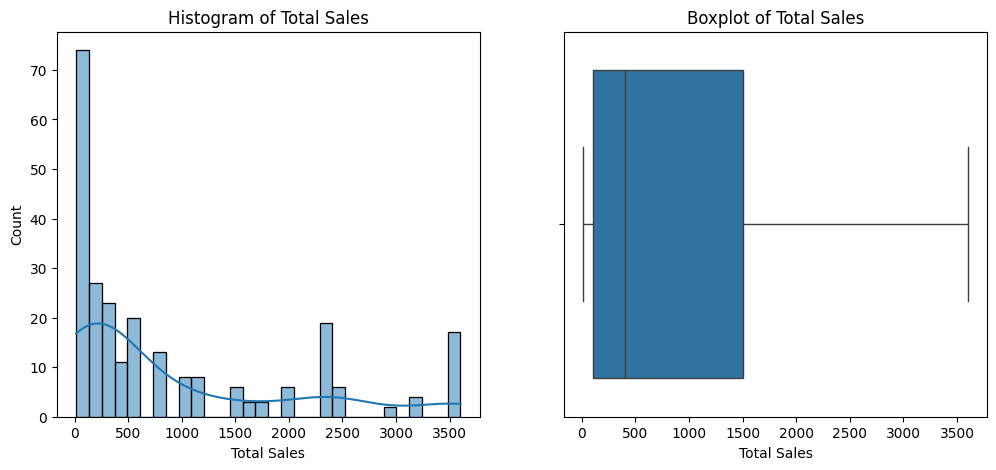

In [19]:
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    
    plt.show()

In [ ]:


# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Replace empty strings or whitespace with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Strip whitespace in string columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()



# Try converting date columns automatically
for col in df.columns:
    if 'date' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert numeric-looking columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='ignore')


# Example: extract month/year from order date if exists
if 'Order Date' in df.columns:
    df['Order_Month'] = df['Order Date'].dt.month
    df['Order_Year'] = df['Order Date'].dt.year



for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])


print("✅ Cleaning complete!")
print("Rows:", df.shape[0], " Columns:", df.shape[1])
print("\nMissing values summary:\n", df.isnull().sum().sort_values(ascending=False).head())

# Save cleaned data
df.to_csv("cleaned_amazon_sales_data.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_amazon_sales_data.csv'")


✅ Cleaning complete!
Rows: 250  Columns: 11

Missing values summary:
 Order ID    0
Date        0
Product     0
Category    0
Price       0
dtype: int64

Cleaned dataset saved as 'cleaned_amazon_sales_data.csv'


C:\Users\PUNIT AYARE\AppData\Local\Temp\ipykernel_15908\345368583.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\PUNIT AYARE\AppData\Local\Temp\ipykernel_15908\345368583.py:24: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


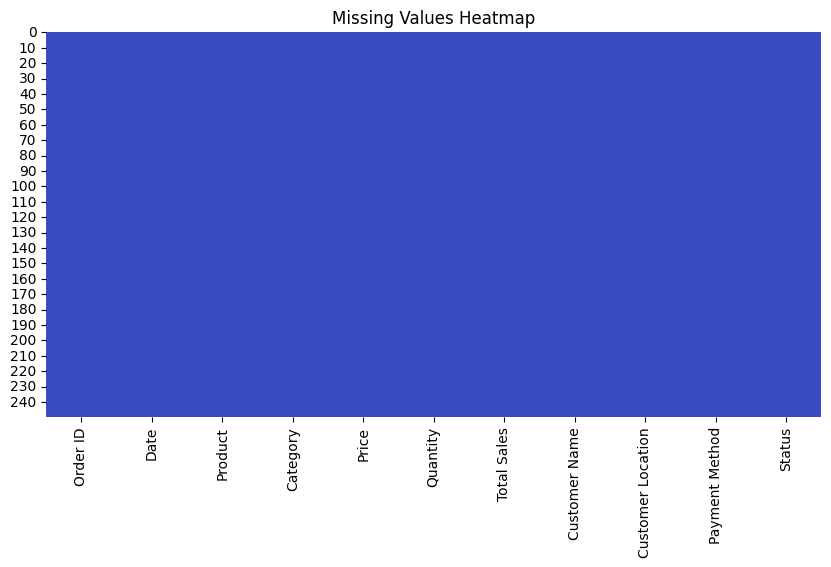

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
df_cleaned = pd.read_csv("cleaned_amazon_sales_data.csv")
plt.figure(figsize=(10,5))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Heatmap")
plt.show()


C:\Users\PUNIT AYARE\AppData\Local\Temp\ipykernel_15908\1089867541.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Price', data=df, estimator='sum', ci=None)


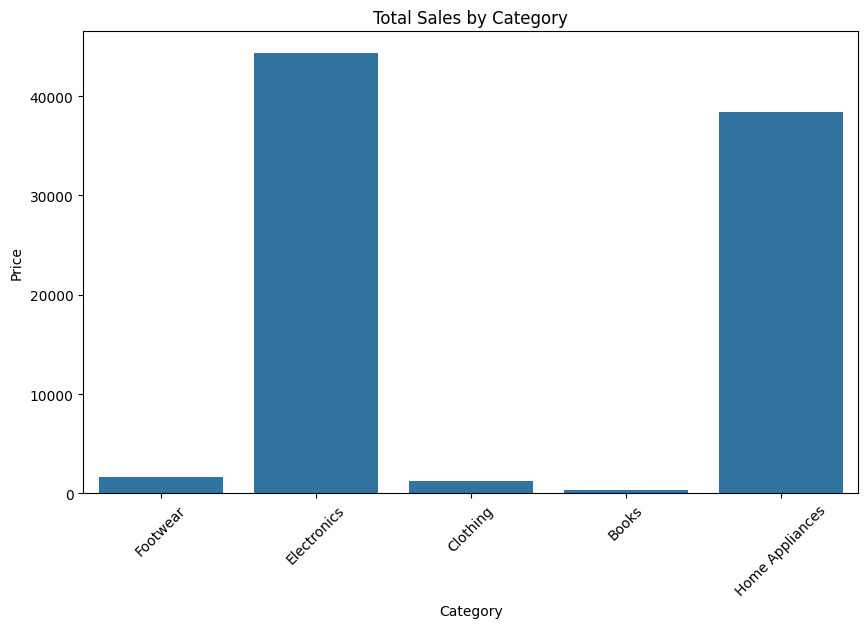

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Price', data=df, estimator='sum', ci=None)
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()


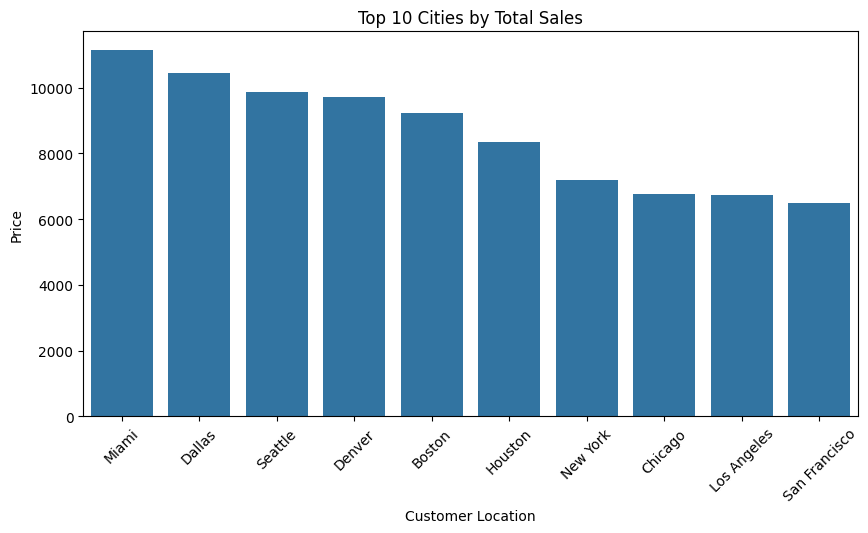

In [15]:
top_cities = df.groupby('Customer Location')['Price'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Customer Location', y='Price', data=top_cities)
plt.title("Top 10 Cities by Total Sales")
plt.xticks(rotation=45)
plt.show()



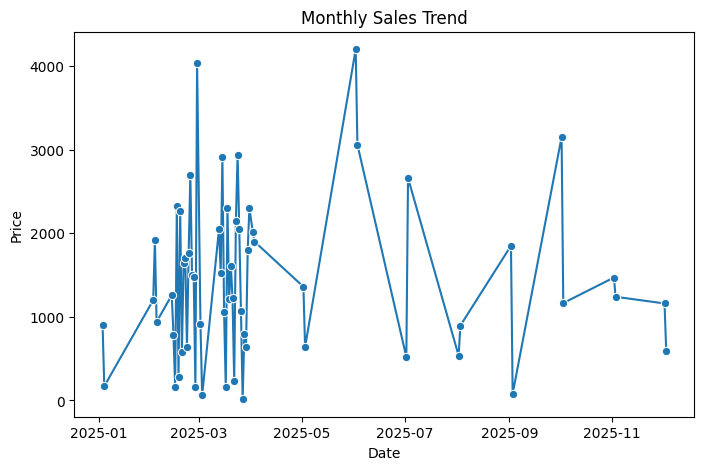

In [16]:
monthly_sales = df.groupby('Date')['Price'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='Date', y='Price', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.show()
